# Project Title: AAPL Close Price Predition using LSTM
## By: Abhishek Patil

## Project Background:
### We are trying to predict the close prices of AAPL stock using LSTM model. We have gathered the daily data of APPLE STOCK from 2010 to 2024 apple stock.
## Importing all the required Libraries:


In [ ]:
import math
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import r2_score, mean_squared_error


# Download the Required Data from Yahoo Finance:



In [ ]:
# Download AAPL data from 2010-01-01 to 2024-01-01
aapl_data = yf.download('AAPL', start='2010-01-01', end='2024-01-01')

# Print the last few rows of the data
aapl_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [ ]:
aapl_data.shape

(3522, 6)

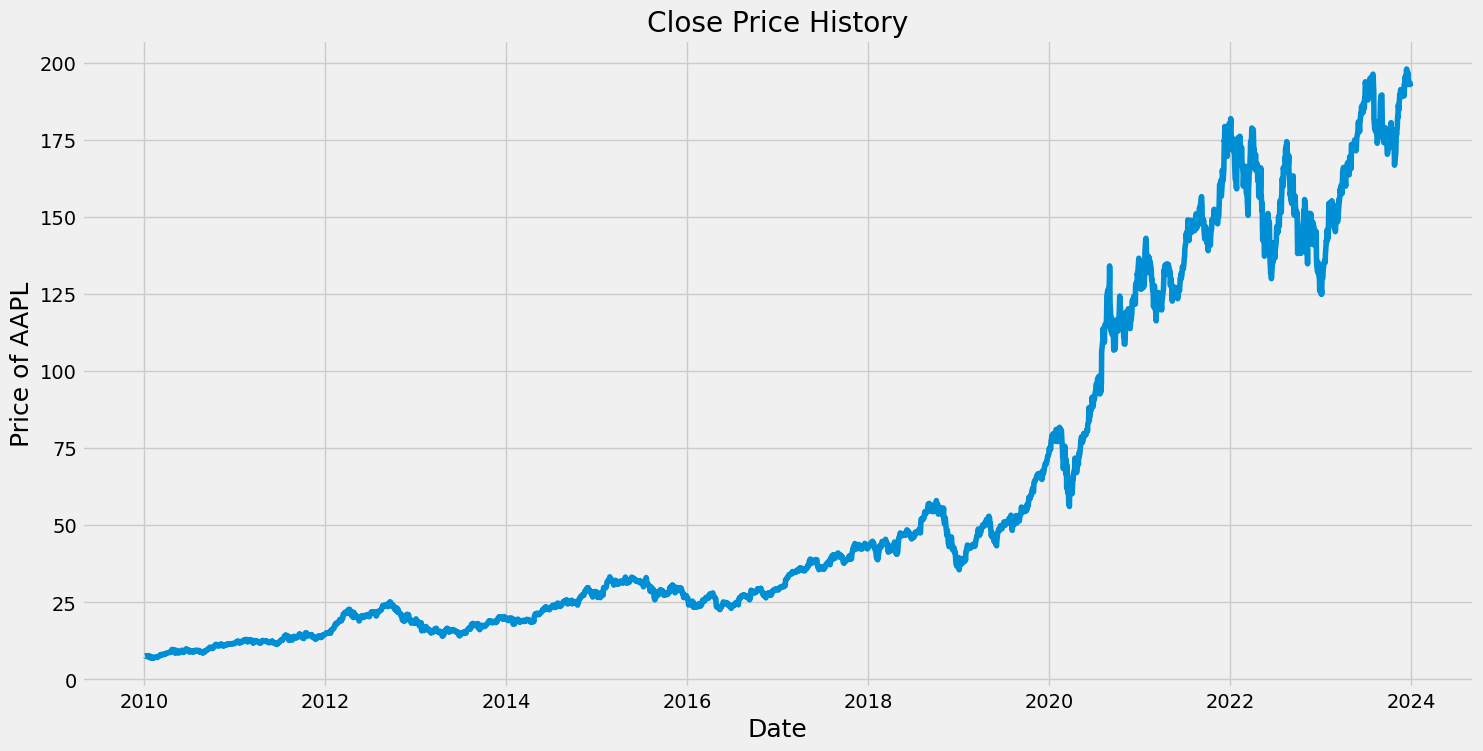

In [ ]:
#Visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(aapl_data["Close"])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price of AAPL', fontsize = 18)
plt.show()

In [ ]:
#Create a mew dataframe
aapl_close_data = aapl_data.filter(['Close'])

#Convert the DataFrame to a numpy array
dataset = aapl_close_data.values

# Get the numbe of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)



In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

In [ ]:
# Create teh training data
# Create the scaled training data set

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <=60:
    print(x_train)
    print(y_train)
    print()

[array([4.10081399e-03, 4.16990948e-03, 3.53312539e-03, 3.46029250e-03,
       3.72172994e-03, 3.37253003e-03, 2.92621544e-03, 3.47336463e-03,
       3.24554370e-03, 2.59195259e-03, 4.29315593e-03, 3.67504878e-03,
       2.99157355e-03, 1.06441674e-03, 2.05787553e-03, 2.59382004e-03,
       2.95609707e-03, 1.35199593e-03, 1.86495266e-06, 5.00460545e-04,
       7.11476946e-04, 1.34079126e-03, 0.00000000e+00, 6.36779110e-04,
       3.86548837e-04, 7.73102661e-04, 5.73288442e-04, 1.23621678e-03,
       1.55554505e-03, 2.11950124e-03, 1.96077333e-03, 2.03173129e-03,
       1.79643809e-03, 1.56301234e-03, 9.35565469e-04, 1.60783353e-03,
       1.85806380e-03, 2.34732217e-03, 3.16338107e-03, 3.13723683e-03,
       3.22686675e-03, 3.48456930e-03, 5.02331232e-03, 5.04758912e-03,
       5.78334535e-03, 6.12321054e-03, 6.24645698e-03, 6.45187603e-03,
       5.93647342e-03, 6.05038264e-03, 5.98875942e-03, 6.08773156e-03,
       5.63955451e-03, 6.10640602e-03, 6.78053654e-03, 6.96914608e-03,
     

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(2758, 60)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2758, 60, 1)

## Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture that is particularly effective for sequential data like time series, making it suitable for financial data analysis and stock price prediction.

## Here's a simplified explanation of how LSTM works in finance:

### 1) Sequential Data Handling: In finance, historical stock price data is sequential, where each data point depends on previous ones. LSTM is well-suited for capturing patterns and dependencies in such sequential data.

### 2) Memory and Forget Gates: LSTM has the ability to retain information over long periods and selectively forget irrelevant information. It achieves this through mechanisms called memory cells and gates.

#### Memory Cell: The memory cell stores information over time.
#### Forget Gate: This gate decides which information to discard from the cell state.

### 3) Update and Output Gates: LSTM also has mechanisms for updating and outputting information from the memory cell.

#### Update Gate: This gate decides how much of the new information will be stored in the memory cell.
#### Output Gate: It controls how much information from the memory cell will be used to predict the output.
### 4) Training and Learning: During training, the LSTM model adjusts its parameters (weights and biases) based on historical data to learn patterns and relationships. It does this through a process called backpropagation, where errors are propagated backward through the network to update the parameters.

## Example:
## Let's say we want to predict the closing price of a stock based on its historical prices over the past 30 days. We can use an LSTM model to learn patterns from this historical data and make predictions for future closing prices.

#### 1)Input Data: For each day, we input the stock's closing price, volume, and other relevant features over the past 30 days.
#### 2)LSTM Model: The LSTM model processes this sequential input data, learning patterns and relationships between past prices and future prices.
#### 3)Training: During training, the model adjusts its parameters by comparing its predictions with actual closing prices from the training data.
#### 4)Prediction: After training, the model can predict the closing price for the next day based on the most recent historical data.

##In summary, LSTM models in finance analyze sequential data like historical stock prices, capturing patterns and dependencies to make predictions about future prices. They are trained to remember relevant information while discarding irrelevant data, enabling accurate forecasting of stock prices.

In [ ]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs = 100)

2758/2758 [==============================] - 100s 35ms/step - loss: 5.1453e-04


In [ ]:
# Create the testing dataset
# Create a new array containing scaled values from index 2758 to 3522
test_data = scaled_data[training_data_len-60: , :]

# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))


In [ ]:
# get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


22/22 [==============================] - 1s 18ms/step


In [ ]:
r_squared = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(r_squared)
print(mse)
print(rmse)

0.9317281152030685
25.12545287190592
5.012529588132715


# Performance Metrics:
## R-Squared: 93.17 %
## Mean Squared Error: 25.12
## Root Mean Squared Error: 5.01
## These metric are realtively good for the LSTM model.

<ipython-input-47-fe342363abb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


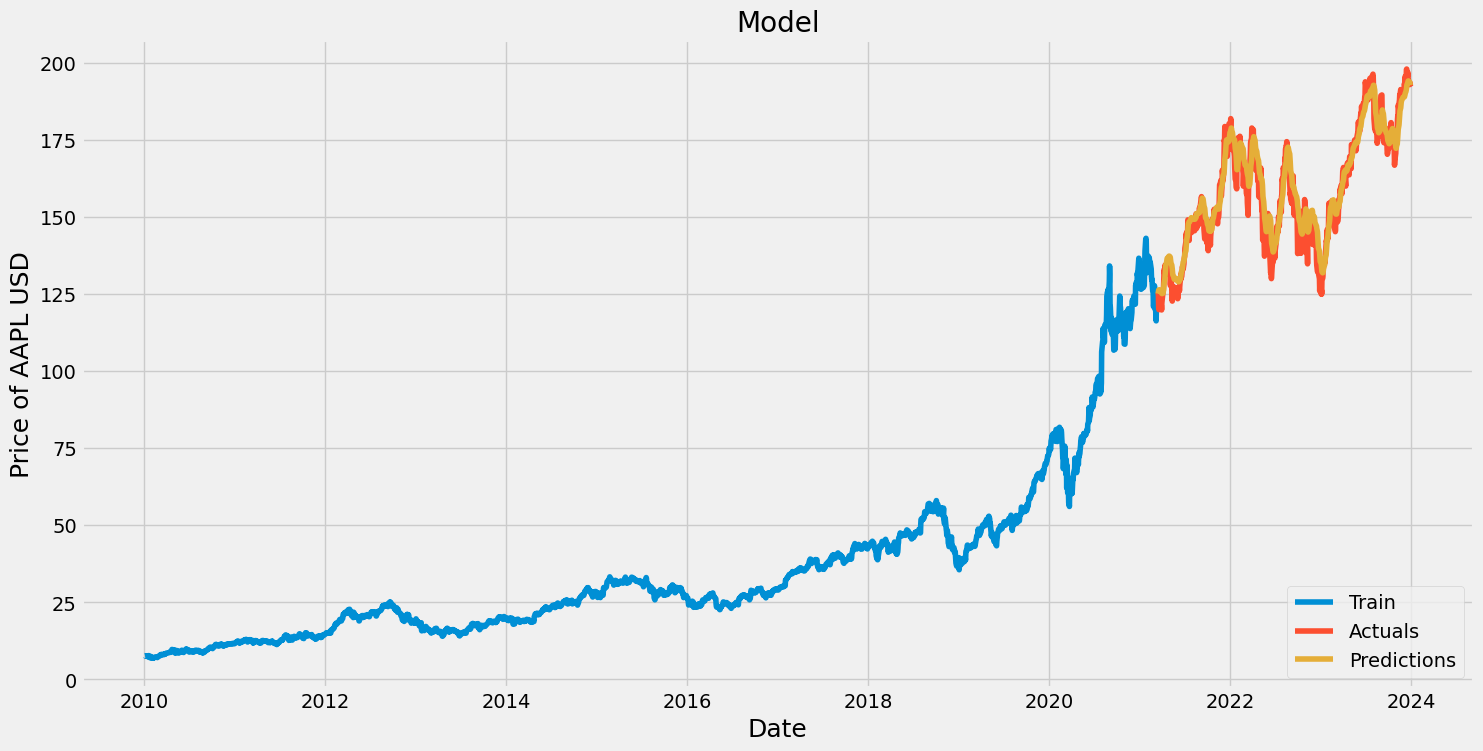

In [ ]:
# Plot the data
train = aapl_data[:training_data_len]
valid = aapl_data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price of AAPL USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actuals', 'Predictions'], loc = 'lower right')
plt.show()


In [ ]:
valid[["Close", "Predictions"]]

,Close,Predictions
Date,,
2021-03-16,125.570000,123.698273
2021-03-17,124.760002,124.235130
2021-03-18,120.529999,124.669403
2021-03-19,119.989998,124.481834
2021-03-22,123.389999,124.049240
...,...,...
2023-12-22,193.600006,184.247253
2023-12-26,193.050003,183.985336
2023-12-27,193.149994,183.687149


# Predicting the next days Price:

In [ ]:
# Get the quote
# Download AAPL data from 2010-01-01 to 2024-01-01
aapl_data = yf.download('AAPL', start='2010-01-01', end='2024-01-01')

#Create a New DataFrame
new_df = aapl_data.filter(["Close"])

#Get the last 60 days Closing Prices
last_60_days = new_df[-60:].values

#Scale the data to be the values between 0 an 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []
X_test.append(last_60_days_scaled)

#Convert the x_test datates to numpy array
X_test = np.array(X_test)

# Reahape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted Scaled Prices
pred_price = model.predict(X_test)

#Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 850ms/step
[[183.1317]]


# Future Application:

## 1) we have used LSTM model beacuse of which it is really hard to backtest this model.
## 2) The performance metrics are way too good so we need to check for overfitting that's why backtesting the model is necessary.
## 3) we can use this model to predict the stock price of different Stocks as well.

